# Klasifikasi Gagal Jantung Menggunakan Algoritma SVM, Naive Bayes, dan Decition Tree


Penyakit kardiovaskular, khususnya gagal jantung, merupakan salah satu penyebab utama kematian di seluruh dunia. Gagal jantung terjadi ketika jantung tidak mampu memompa darah secara efektif untuk memenuhi kebutuhan tubuh. Menurut World Health Organization (WHO), jutaan orang didiagnosis dengan gagal jantung setiap tahunnya, dan tingkat kematian yang diakibatkannya cukup tinggi, terutama pada pasien yang terlambat mendapatkan diagnosis dan penanganan.

Di era digital saat ini, data medis pasien dapat dimanfaatkan untuk membangun sistem prediksi yang dapat membantu tenaga medis dalam proses diagnosis. Salah satu pendekatan yang banyak digunakan dalam analisis data medis adalah machine learning, khususnya dalam tugas klasifikasi. Dengan machine learning, pola-pola dari data historis pasien dapat dipelajari untuk memprediksi kemungkinan kematian atau keselamatan pasien akibat gagal jantung.

Penelitian ini bertujuan untuk menerapkan dan membandingkan beberapa algoritma klasifikasi dalam memprediksi kematian pada pasien gagal jantung berdasarkan data klinis. Beberapa algoritma yang digunakan antara lain Naive Bayes, Decision Tree, dan Support Vector Machine (SVM) Masing-masing algoritma akan dievaluasi menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1-score untuk mengetahui algoritma mana yang memberikan performa terbaik pada dataset ini.

Dengan adanya sistem prediksi yang akurat, diharapkan dapat membantu meningkatkan deteksi dini serta pengambilan keputusan yang lebih cepat dalam penanganan pasien gagal jantung.

# **Data Understanding**

## Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Kumpulan data ini berisi catatan medis 299 pasien yang mengalami gagal jantung, yang dikumpulkan selama periode tindak lanjut, di mana setiap profil pasien memiliki 13 ciri klinis.

Deskripsi terperinci tentang kumpulan data dapat ditemukan di bagian Kumpulan Data dalam makalah berikut: Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

## **Visualisasi Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [13]:
import pandas as pd

# Membaca file
df = pd.read_csv('heart_failure.csv')

pd.options.display.max_rows = 10
df



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


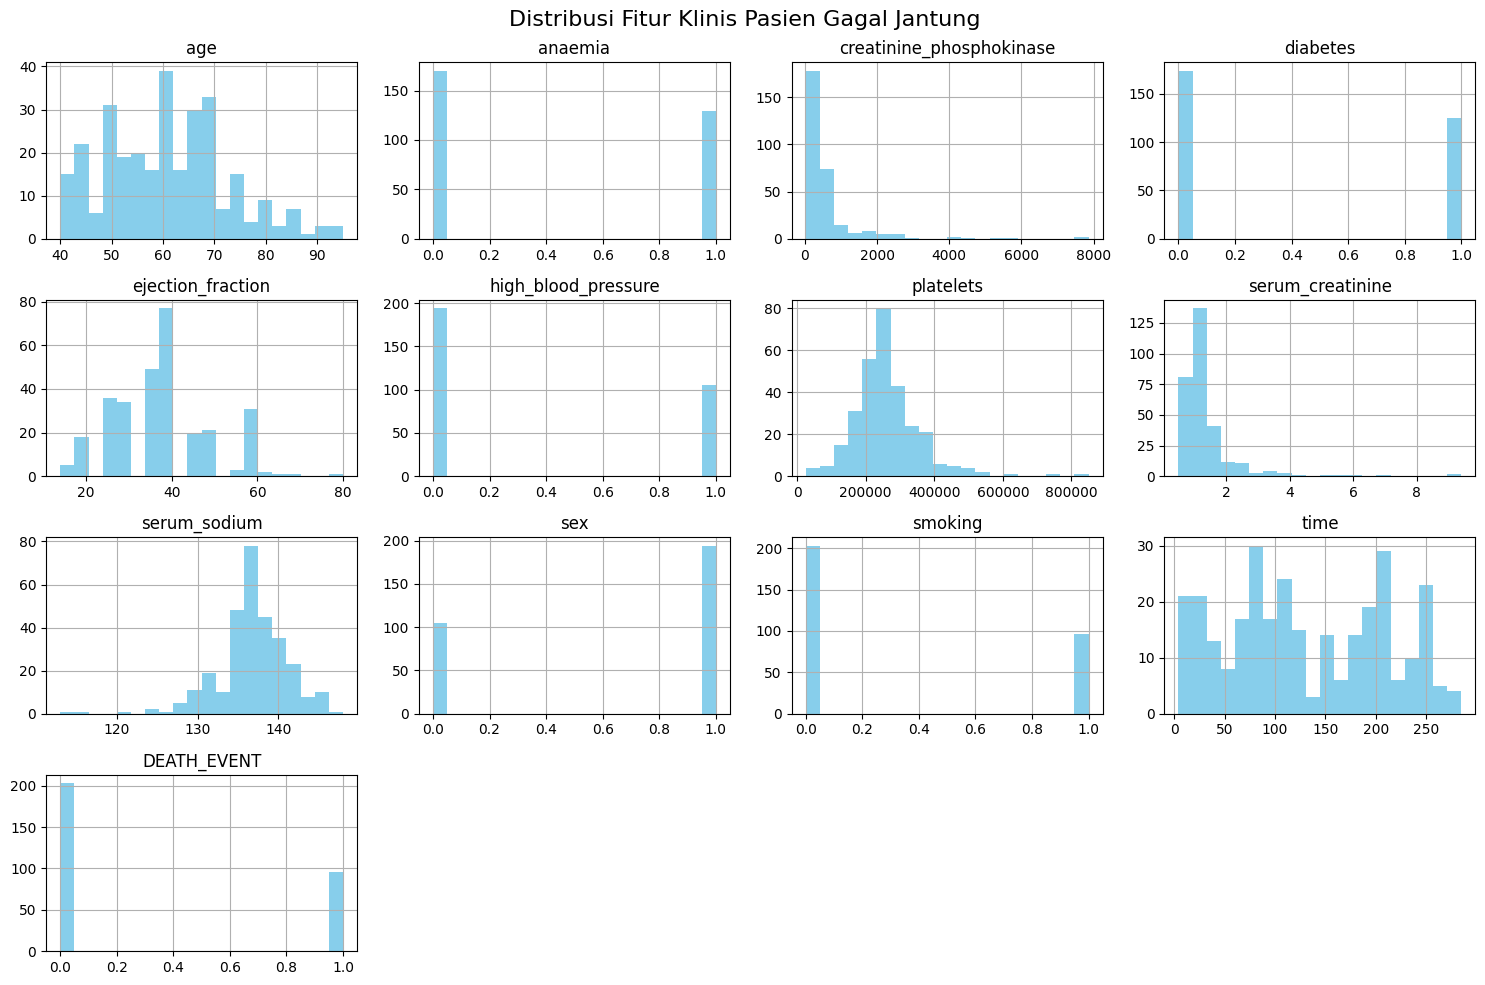

In [14]:
# Histogram semua kolom numerik
df.hist(figsize=(15, 10), bins=20, color='skyblue')
plt.suptitle('Distribusi Fitur Klinis Pasien Gagal Jantung', fontsize=16)
plt.tight_layout()
plt.show()


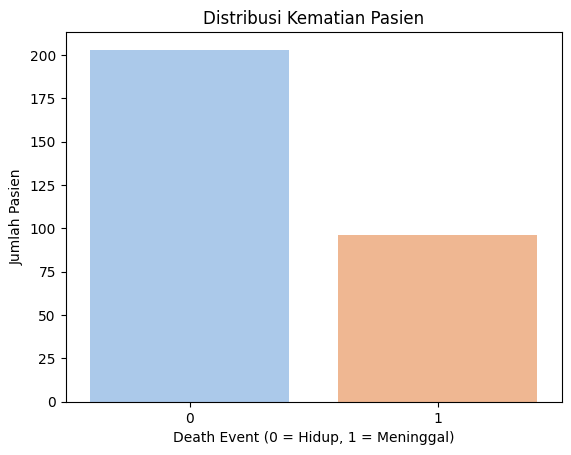

In [15]:
sns.countplot(x='DEATH_EVENT', data=df, palette='pastel')
plt.title('Distribusi Kematian Pasien')
plt.xlabel('Death Event (0 = Hidup, 1 = Meninggal)')
plt.ylabel('Jumlah Pasien')
plt.show()


## **Struktur Dataset**

#### **Fitur dan Label**

In [17]:
df.shape

(299, 13)

terdapat 299 baris dan 13 kolom

In [18]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi.

Terdapat 13 fitur dari dataset ini
1. age : Berisi usia pasien dalam tahun
2. anaemia :berisi informasi apakah pasien mengalami anemia. Anemia dapat memperparah kondisi jantung karena suplai oksigen ke jaringan menjadi terganggu.
3. creatinine_phosphokinase: Berisi kadar enzim creatinine phosphokinase dalam darah (satuan mcg/L). Nilai tinggi menunjukkan kemungkinan kerusakan otot, termasuk otot jantung.
4. diabetes: berisi informaasi Diabetes merupakan salah satu faktor risiko utama penyakit kardiovaskular.
5. ejection_fraction: Berisi persentase darah yang dipompa keluar dari jantung setiap detak (dari bilik kiri). Nilai normal biasanya di atas 50%.
6. high_blood_pressure: berisi informasi apakah pasien memiliki tekanan darah tinggi (hipertensi). Hipertensi dapat menyebabkan pembesaran jantung dan melemahkan fungsi jantung.
7. platelets: Berisi jumlah trombosit dalam darah (dalam kiloplatelets per mL). Trombosit berperan dalam pembekuan darah.
8. serum_creatinine: Berisi kadar kreatinin dalam darah (mg/dL), indikator fungsi ginjal dan kesehatan jantung.
9. serum_sodium: Berisi kadar sodium (natrium) dalam darah (mEq/L). Nilai rendah bisa menandakan gangguan fungsi jantung.
10. sex: Berisi jenis kelamin pasien.
11. smoking :  berisi informasi apakah pasien merokok. Merokok merupakan faktor risiko utama penyakit jantung
12. time : berisi durasi tindak lanjut atau observasi pasien selama studi berlangsung, dinyatakan dalam hari.
13. DEATH_EVENT : merupakan label atau variabel target yang ingin diprediksi oleh model machine learning. Label ini menunjukkan apakah pasien meninggal selama periode observasi.

Terdapat 1 field label dengan 2 kelas pada dataset ini:

*   0 : Pasien masih hidup pada akhir periode observasi.

*   1 : Pasien meninggal selama periode observasi.



In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart_failure.csv')

# Buat DataFrame khusus untuk menampilkan semua fitur dan tipe datanya
info_df = pd.DataFrame({
    'Fitur': df.columns,
    'Tipe Data': df.dtypes.values
})

# Tampilkan hasil
print(info_df.to_string(index=False))


                   Fitur Tipe Data
                     age   float64
                 anaemia     int64
creatinine_phosphokinase     int64
                diabetes     int64
       ejection_fraction     int64
     high_blood_pressure     int64
               platelets   float64
        serum_creatinine   float64
            serum_sodium     int64
                     sex     int64
                 smoking     int64
                    time     int64
             DEATH_EVENT     int64


Penjelasan lebih jelas fitur:

1. age (numerik) : Berisi usia pasien dalam tahun.
2. anaemia (kategorikal nominal)
Berisi status anemia pasien.
Nilai:
  *  0 = Tidak anemia
  *  1 = Anemia (kadar hemoglobin rendah)
3. creatinine_phosphokinase (numerik) :
Berisi kadar enzim CPK dalam darah (dalam mcg/L). Nilai tinggi bisa menandakan kerusakan otot, termasuk jantung.
4. diabetes (kategorikal nominal)
Berisi status diabetes pasien.
Nilai:
  *  0 = Tidak diabetes
  *  1 = Menderita diabetes
5. ejection_fraction (numerik)
Berisi persentase darah yang dipompa keluar dari ventrikel kiri jantung setiap detak. Nilai rendah menunjukkan gangguan fungsi jantung.
6. high_blood_pressure (kategorikal nominal)
Berisi status tekanan darah tinggi (hipertensi).
Nilai:
  *  0 = Tidak hipertensi
  *  1 = hipertensi
7. platelets (numerik):
Berisi jumlah trombosit dalam darah (dalam kiloplatelets/mL), yang memengaruhi proses pembekuan darah.
8. serum_creatinine (numerik) :
Berisi kadar kreatinin dalam darah (mg/dL), yang dapat menjadi indikator fungsi ginjal dan jantung.
9. serum_sodium (numerik):
Berisi kadar natrium (sodium) dalam darah (mEq/L). Natrium rendah bisa menandakan ketidakseimbangan cairan karena gagal jantung.
10. sex (kategorikal nominal)
Berisi jenis kelamin pasien.
Nilai:
  *  0 = Perempuan
  *  1 = Laki-Laki
11. smoking (kategorikal nominal)
Berisi informasi apakah pasien adalah perokok.
Nilai:
  *  0 =  Tidak merokok
  *  1 = Merokok
12. time (numerik)
Berisi lama waktu (dalam hari) pasien diobservasi selama masa studi.
13. DEATH_EVENT (kategorikal nominal – label)
Merupakan label atau variabel target klasifikasi.
Nilai:
  *  0 =  Pasien hidup selama periode observasi
  *  1 = Pasien meninggal selama periode observasi











In [26]:
# Hitung jumlah masing-masing kelas pada DEATH_EVENT
df['DEATH_EVENT'].value_counts()


,count
DEATH_EVENT,
0,203
1,96


## **Eksplorasi Data**

### **Identifikasi Kualitas dataset**

#### **Deteksi Missing Value**

Missing values atau nilai hilang adalah kondisi di mana sebagian data dalam sebuah dataset tidak tersedia atau tidak tercatat. Masalah ini sering dijumpai dalam proses pengumpulan data, baik karena kesalahan teknis, data yang tidak dapat diakses, atau respons yang tidak diberikan oleh responden (pada data survei).

Dalam analisis data dan machine learning, keberadaan missing values dapat menyebabkan:


*   Hasil analisis statistik yang bias
*   Menurunnya performa model prediksi
*   Error pada saat proses training model (banyak algoritma tidak menerima nilai kosong)

### **Metode Penanganan Missing Values**
1. Penghapusan Data (Deletion)
  *  Listwise Deletion: Hapus seluruh baris jika ada satu nilai kosong.

  *  Pairwise Deletion: Hapus hanya saat analisis membutuhkan kolom tersebut.

  *  Risiko kehilangan informasi jika terlalu banyak missing values

2. Imputasi (Pengisian Nilai Kosong)
* Statistik Sederhana:

  * Mean untuk data numerik dengan distribusi normal.

  * Median jika ada outlier.

  * Modus untuk data kategorikal.

* Interpolasi: Cocok untuk data time series.

* Model Imputasi:
  * KNN Imputer: Mengisi berdasarkan tetangga terdekat.
  * Iterative Imputer: Menggunakan regresi antar fitur.
* Metode Lanjutan:
  * Multiple Imputation (MI): Menghasilkan beberapa imputasi lalu menggabungkannya.
  * Predictive Modeling: Menggunakan algoritma supervised learning untuk memprediksi nilai yang hilang.




In [27]:
import pandas as pd

# Baca dataset
df = pd.read_csv('heart_failure.csv')

# Cek jumlah missing values setiap kolom
missing = df.isnull().sum()

# Tampilkan hanya kolom yang memiliki missing values (jika ada)
missing = missing[missing > 0]

print("Missing values per fitur:")
print(missing)


Missing values per fitur:
Series([], dtype: int64)


In [29]:
# Buat DataFrame ringkasan jumlah & persentase missing values
missing_summary = pd.DataFrame({
    'Jumlah Missing': df.isnull().sum(),
    'Persentase (%)': (df.isnull().sum() / len(df)) * 100
})

# Tampilkan hanya kolom yang memiliki missing
missing_summary = missing_summary[missing_summary['Jumlah Missing'] > 0]

print(missing_summary)


Empty DataFrame
Columns: [Jumlah Missing, Persentase (%)]
Index: []


Berdasarkan hasil pengecekan missing values diatas,didapatkan bahwa data tidak terdapat missing value

# **Preprocessing Data**

dikarenakan pada dataset ini tidak ada missing value maka langkah untuk menangani missing values di lewati.

## **Menangani duplikat**





In [30]:
# Cek jumlah baris duplikat secara keseluruhan (baris yang identik)
df.duplicated().sum()


np.int64(0)

karena hasil pengecekan duplikat 0 maka pada dataset ini tidak ada duplikat data dan tidak perlu untuk menghapus atau mengubah duplikat.

## **Pisahkan Fitur dan label**





data harus dipisahkan menjadi fitur (X ->)fitur  dan label (y -> target) agar model machine learning bisa membedakan antara input (data yang digunakan untuk belajar) dan target (hasil yang ingin diprediksi). Hal ini juga mencegah data leakage dan memastikan model dilatih dengan cara yang benar sesuai standar library seperti Scikit-learn.

In [34]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns='DEATH_EVENT')  # fitur
y = df['DEATH_EVENT']               # label


In [35]:
# Tampilkan 10 baris pertama fitur
X.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10


In [36]:
# Tampilkan 10 baris pertama label
y.head(10)


,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


 ## **Menangani Outlier**





### **Menangani Outlier menggunakan IQR**





In [43]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

# Duplikat data dan buang kolom target 'DEATH_EVENT'
data1 = df.drop(columns='DEATH_EVENT')  # df adalah dataset utama kamu

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []

for column in data1.columns:
    # Ambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)

    # Lakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)

    # Simpan index dan nama fitur jika nilai adalah outlier (-1)
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Hilangkan duplikat (jika satu baris memiliki lebih dari satu outlier)
outlier_indices = list(set(outlier_indices))

# Tampilkan hasil indeks dan kolom dari outlier
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"Outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung minimal satu outlier
outlier_row_indices = list(set([index[0] for index in outlier_indices]))

# Menampilkan data pada baris yang mengandung outlier
outlier_data = df.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)

# Buat label ground truth (buatan, untuk evaluasi internal)
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(df))]
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(df))]

# Menghitung precision (dalam konteks ini, selalu 1.0 karena sama)
precision = precision_score(ground_truth_labels, predicted_labels)
print("==================================== AKURASI ====================================")
print(f"Precision (self-evaluation): {precision}")


===================================== OUTLIER =====================================
Outlier ditemukan pada baris => 294, kolom => serum_sodium
Outlier ditemukan pada baris => 157, kolom => platelets
Outlier ditemukan pada baris => 10, kolom => serum_sodium
Outlier ditemukan pada baris => 131, kolom => serum_sodium
Outlier ditemukan pada baris => 166, kolom => time
Outlier ditemukan pada baris => 265, kolom => time
Outlier ditemukan pada baris => 168, kolom => time
Outlier ditemukan pada baris => 256, kolom => time
Outlier ditemukan pada baris => 181, kolom => time
Outlier ditemukan pada baris => 192, kolom => platelets
Outlier ditemukan pada baris => 16, kolom => platelets
Outlier ditemukan pada baris => 251, kolom => creatinine_phosphokinase
Outlier ditemukan pada baris => 42, kolom => creatinine_phosphokinase
Outlier ditemukan pada baris => 225, kolom => platelets
Outlier ditemukan pada baris => 78, kolom => serum_sodium
Outlier ditemukan pada baris => 44, kolom => creatinine_phospho

In [44]:
# Hitung jumlah outlier unik
jumlah_outlier = len(set(outlier_row_indices))

# Hitung total baris data
jumlah_total = len(df)

# Hitung persentase
persentase_outlier = (jumlah_outlier / jumlah_total) * 100

# Tampilkan hasil
print(f"Jumlah outlier: {jumlah_outlier} dari {jumlah_total} baris")
print(f"Persentase outlier: {persentase_outlier:.2f}%")

# Cek apakah < 10%
if persentase_outlier < 10:
    print("✅ Jumlah outlier kurang dari 10% (aman untuk dihapus)")
else:
    print("⚠️ Jumlah outlier lebih dari 10%, pertimbangkan imputasi atau evaluasi lebih lanjut.")


Jumlah outlier: 50 dari 299 baris
Persentase outlier: 16.72%
⚠️ Jumlah outlier lebih dari 10%, pertimbangkan imputasi atau evaluasi lebih lanjut.


karena outlier lebih dari 16 persen maka perlu dilakukan imputasi (Ganti nilai outlier dengan nilai wajar)

saya akan mengganti outlier dengan IQR.
 Langkah-langkah:
1. Iterasi semua fitur numerik (X).

2. Hitung batas bawah dan atas IQR.

3.Ganti semua nilai outlier:
   1. Di bawah batas bawah → ganti dengan batas bawah.
   2. Di atas batas atas → ganti dengan batas atas

In [48]:
# Salin data asli ke X_fixed agar data awal tidak berubah
X_fixed = X.copy()

for col in X_fixed.columns:
    Q1 = X_fixed[col].quantile(0.25)
    Q3 = X_fixed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti nilai yang lebih kecil dari lower_bound dengan lower_bound
    X_fixed.loc[X_fixed[col] < lower_bound, col] = lower_bound

    # Ganti nilai yang lebih besar dari upper_bound dengan upper_bound
    X_fixed.loc[X_fixed[col] > upper_bound, col] = upper_bound

print("✅ Semua outlier berhasil ditangani menggunakan batas IQR.")


✅ Semua outlier berhasil ditangani menggunakan batas IQR.


In [49]:
print("\nCek ulang jumlah outlier di setiap fitur:")

for col in X_fixed.columns:
    Q1 = X_fixed[col].quantile(0.25)
    Q3 = X_fixed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count_outlier = ((X_fixed[col] < lower) | (X_fixed[col] > upper)).sum()
    print(f"- {col}: {count_outlier} outlier")



Cek ulang jumlah outlier di setiap fitur:
- age: 0 outlier
- anaemia: 0 outlier
- creatinine_phosphokinase: 0 outlier
- diabetes: 0 outlier
- ejection_fraction: 0 outlier
- high_blood_pressure: 0 outlier
- platelets: 0 outlier
- serum_creatinine: 0 outlier
- serum_sodium: 0 outlier
- sex: 0 outlier
- smoking: 0 outlier
- time: 0 outlier


karena sudah tidak ada outlier maka lanjut tahap selanjutnya yaitu normalisasi

 ## **Normalisasi**





Dalam tugas klasifikasi yang melibatkan algoritma Support Vector Machine (SVM), Naive Bayes, dan Decision Tree, normalisasi data menjadi langkah penting dalam tahap pra-pemrosesan, namun penerapannya bergantung pada jenis algoritma yang digunakan. Pada SVM, normalisasi sangat disarankan bahkan dianggap wajib karena algoritma ini bekerja berdasarkan perhitungan jarak antar data dan margin pemisah, sehingga fitur dengan skala yang lebih besar dapat mendominasi hasil pemodelan jika tidak dinormalisasi.

Sementara itu, pada algoritma Naive Bayes, khususnya Gaussian Naive Bayes, normalisasi tidak wajib namun tetap bermanfaat karena algoritma ini mengasumsikan distribusi normal pada setiap fitur — dan normalisasi dapat membantu mendekatkan data ke distribusi tersebut. Berbeda dengan keduanya, Decision Tree tidak memerlukan normalisasi sama sekali karena model ini bekerja dengan membagi data berdasarkan nilai ambang (threshold) dalam setiap fitur, tanpa mempertimbangkan skala. Oleh karena itu, meskipun tidak semua algoritma membutuhkannya, menerapkan normalisasi pada seluruh fitur tetap merupakan langkah aman dan bermanfaat dalam menjaga konsistensi dan meningkatkan performa model tertentu seperti SVM.

###Normalisasi dnegan  MINMaxScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Buat objek scaler
scaler = MinMaxScaler()

# Fit dan transformasi fitur
X_normalized = scaler.fit_transform(X_fixed)

# Jika ingin kembali ke DataFrame
import pandas as pd
X_normalized_df = pd.DataFrame(X_normalized, columns=X_fixed.columns)

# Tampilkan beberapa baris hasil normalisasi
print("Data hasil normalisasi:")
print(X_normalized_df.head())


Data hasil normalisasi:
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364      0.0                  0.444621       0.0           0.112150   
1  0.272727      0.0                  1.000000       0.0           0.448598   
2  0.454545      0.0                  0.097833       0.0           0.112150   
3  0.181818      1.0                  0.069994       0.0           0.112150   
4  0.454545      1.0                  0.108968       1.0           0.112150   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0   0.519231          0.848485      0.217391  1.0   
1                  0.0   0.514720          0.363636      0.478261  1.0   
2                  0.0   0.236264          0.484848      0.173913  1.0   
3                  0.0   0.368132          0.848485      0.521739  1.0   
4                  0.0   0.689560          1.000000      0.000000  0.0   

   smoking      time  
0      0.0  0.000000  
1      0.0

 ## Split Data: Training dan Testing





In [51]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 239
Jumlah data uji: 60


# **Klasifikasi**

## **Klasifikasi dengan  SVM**



## Pengertian

**Support Vector Machine (SVM)** adalah algoritma *supervised learning* yang digunakan untuk klasifikasi maupun regresi. SVM bekerja dengan mencari **garis pemisah terbaik** (*optimal hyperplane*) yang memisahkan data dari dua kelas dengan **margin maksimum**.

SVM sangat efektif pada:
- Data berdimensi tinggi
- Kasus di mana jumlah fitur lebih banyak dari jumlah sampel
- Data non-linear (menggunakan teknik kernel)

---

## Konsep Dasar

SVM bertujuan untuk mencari *hyperplane* dengan **margin terbesar**, yaitu jarak terdekat antara *hyperplane* dan titik data dari kedua kelas.

Titik-titik data yang berada paling dekat ke *hyperplane* disebut **support vectors** dan sangat menentukan posisi hyperplane tersebut.

---

## Fungsi Tujuan SVM (untuk data linear)

Misalkan:
- \( x_i \): vektor fitur dari sampel ke-\( i \)
- \( y_i \in \{-1, +1\} \): label kelas dari sampel ke-\( i \)
- \( w \): vektor bobot
- \( b \): bias

Persamaan *hyperplane* dinyatakan sebagai:

$$f(x) = w^T x + b
$$

Tujuan utama SVM adalah **memaksimalkan margin**, yang secara matematis ekuivalen dengan:

### Fungsi yang diminimalkan:
$$
\min_{w, b} \quad \frac{1}{2} \|w\|^2
$$

### Dengan kendala:
$$
y_i (w^T x_i + b) \geq 1 \quad \forall i
$$

---

## Kernel Trick (untuk data tidak linear)

Ketika data tidak dapat dipisahkan secara linear, SVM menggunakan fungsi kernel untuk mentransformasikan data ke dimensi yang lebih tinggi.

Beberapa kernel yang umum digunakan:

- **Linear**:
  $$
  K(x, x') = x^T x'
  $$

- **Polynomial**:
  $$
  K(x, x') = (x^T x' + c)^d
  $$

- **Radial Basis Function (RBF)**:
  $$
  K(x, x') = \exp\left( -\gamma \|x - x'\|^2 \right)
  $$

---

## Langkah-langkah SVM

1. **Praproses Data**
   - Lakukan normalisasi agar semua fitur berada dalam skala yang sama.

2. **Pilih Kernel**
   - Linear, polynomial, atau RBF sesuai karakteristik data.

3. **Latih Model**
   - Gunakan data latih untuk mencari hyperplane terbaik.

4. **Evaluasi Model**
   - Hitung akurasi, precision, recall, dan F1-score pada data uji.

5. **Tuning Hyperparameter**
   - Lakukan pencarian parameter terbaik seperti \( C \) (regulasi) dan \( \gamma \) (untuk RBF).

---

## Kelebihan SVM

- Efektif untuk data berdimensi tinggi.
- Memiliki margin maksimum sehingga lebih robust.
- Bekerja baik dengan fitur yang banyak dan jumlah data kecil.

## Kekurangan SVM

- Tidak efisien untuk dataset besar.
- Pemilihan kernel dan tuning parameter cukup kompleks.
- Sulit diinterpretasikan jika menggunakan kernel non-linear.

---

## Aplikasi SVM

- Klasifikasi penyakit (misalnya klasifikasi gagal jantung)
- Deteksi spam atau email palsu
- Pengenalan pola dan wajah
- Prediksi keuangan dan pasar saham


In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Latih model pada data training
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [53]:
# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"🎯 Akurasi SVM: {accuracy:.4f}")

# Confusion Matrix
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Laporan klasifikasi lengkap
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_svm))


🎯 Akurasi SVM: 0.7667

🧾 Confusion Matrix:
[[38  3]
 [11  8]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60



In [57]:
# Hitung jumlah data yang benar dan salah diklasifikasi
benar = (y_pred_svm == y_test).sum()
salah = (y_pred_svm != y_test).sum()

print(f"Jumlah data diklasifikasikan BENAR: {benar}")
print(f"Jumlah data diklasifikasikan SALAH: {salah}")


Jumlah data diklasifikasikan BENAR: 46
Jumlah data diklasifikasikan SALAH: 14


In [58]:
from IPython.display import display

# Filter data salah klasifikasi
X_test_df = X_test.copy()
X_test_df['Actual'] = y_test.values
X_test_df['Predicted'] = y_pred_svm

salah_df = X_test_df[X_test_df['Actual'] != X_test_df['Predicted']]

# Tampilkan sebagai tabel
print(" Data yang salah diklasifikasikan oleh SVM:")
display(salah_df)


 Data yang salah diklasifikasikan oleh SVM:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Actual,Predicted
110,0.818182,0.0,0.084311,0.0,0.859813,0.0,0.631868,0.424242,0.304348,1.0,1.0,0.306050,1,0
190,0.727273,0.0,0.444621,1.0,0.392523,0.0,0.752747,0.969697,0.391304,1.0,0.0,0.604982,0,1
213,0.145455,1.0,0.085902,1.0,0.299065,1.0,0.461538,0.666667,0.217391,0.0,0.0,0.672598,1,0
68,0.545455,0.0,0.109763,0.0,0.205607,0.0,0.461538,0.424242,0.739130,0.0,0.0,0.220641,1,0
140,0.727273,0.0,0.621992,0.0,0.448598,0.0,0.514720,0.363636,0.391304,1.0,0.0,0.373665,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.454545,1.0,0.023066,0.0,0.205607,1.0,0.549451,0.484848,0.521739,0.0,0.0,0.042705,0,1
230,0.363636,0.0,0.113740,0.0,0.299065,0.0,0.000000,0.727273,0.086957,0.0,0.0,0.722420,1,0
63,0.090909,0.0,0.444621,0.0,0.392523,0.0,0.848901,0.303030,0.869565,1.0,0.0,0.202847,1,0
117,0.818182,1.0,0.062836,0.0,0.859813,0.0,1.000000,1.000000,0.565217,0.0,0.0,0.320285,0,1


## **Klasifikasi dengan  Naive Bayes**



## Pengertian

**Naive Bayes** adalah algoritma *supervised learning* yang digunakan untuk klasifikasi. Algoritma ini didasarkan pada **Teorema Bayes**, dengan asumsi "naive" bahwa setiap fitur saling **independen secara kondisional** terhadap kelas.

Naive Bayes sangat cocok untuk:
- Teks klasifikasi (spam filtering, sentiment analysis)
- Dataset besar dengan dimensi tinggi
- Data diskrit maupun kontinu

---

## Teorema Bayes

Teorema Bayes menyatakan:

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

Keterangan:
- \( P(C \mid X) \): probabilitas kelas \( C \) diberikan fitur \( X \)
- \( P(X \mid C) \): probabilitas fitur \( X \) diberikan kelas \( C \)
- \( P(C) \): probabilitas a priori dari kelas \( C \)
- \( P(X) \): probabilitas dari fitur \( X \)

---

## Prinsip Naive Bayes

Dengan asumsi independensi antar fitur, kita dapat menyederhanakan:

$$
P(X \mid C) = P(x_1 \mid C) \cdot P(x_2 \mid C) \cdot \dots \cdot P(x_n \mid C)
$$

Sehingga:

$$
P(C \mid X) \propto P(C) \cdot \prod_{i=1}^{n} P(x_i \mid C)
$$

Model akan memilih kelas \( C \) dengan probabilitas posterior tertinggi:

$$
\hat{y} = \arg\max_C \left[ P(C) \cdot \prod_{i=1}^{n} P(x_i \mid C) \right]
$$

---

## Jenis-Jenis Naive Bayes

1. **Gaussian Naive Bayes**
   - Digunakan untuk fitur numerik yang diasumsikan menyebar secara normal (Gaussian).
   - Rumus distribusi normal:

     $$
     P(x_i \mid C) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
     $$

2. **Multinomial Naive Bayes**
   - Cocok untuk data diskrit seperti hitungan kata (bag of words).
   - Sering digunakan untuk klasifikasi teks.

3. **Bernoulli Naive Bayes**
   - Cocok untuk data biner (fitur boolean).

---

## Langkah-langkah Klasifikasi Naive Bayes

1. **Hitung Prior Probabilitas**:  
   Probabilitas masing-masing kelas dari data latih:  
   $$ P(C) = \frac{\text{jumlah data kelas } C}{\text{total data}} $$

2. **Hitung Likelihood**:  
   Probabilitas tiap fitur terhadap kelas menggunakan distribusi Gaussian (jika numerik):

   $$
   P(x_i \mid C) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
   $$

   Di mana:
   - \( \mu \) adalah rata-rata fitur pada kelas tersebut
   - \( \sigma \) adalah standar deviasi fitur pada kelas tersebut

3. **Hitung Posterior** untuk setiap kelas:

   $$
   P(C \mid X) \propto P(C) \cdot \prod_{i=1}^{n} P(x_i \mid C)
   $$

4. **Pilih Kelas dengan Probabilitas Tertinggi**

---

## Kelebihan Naive Bayes

- Cepat dan efisien
- Bekerja baik untuk data dengan banyak fitur
- Tidak memerlukan banyak data pelatihan

## Kekurangan Naive Bayes

- Asumsi independensi antar fitur sering tidak realistis
- Akurasi bisa menurun jika fitur saling bergantung
- Tidak bisa menangani data numerik dengan distribusi non-Gaussian (jika pakai GaussianNB)

---

## Contoh Aplikasi

- Deteksi spam
- Analisis sentimen
- Diagnosis penyakit (termasuk klasifikasi gagal jantung)
- Prediksi customer churn


In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model dengan data training
nb_model.fit(X_train, y_train)


GaussianNB()

In [63]:
# Prediksi pada data uji
y_pred_nb = nb_model.predict(X_test)

# Evaluasi akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"🎯 Akurasi Naive Bayes: {accuracy_nb:.4f}")

# Confusion Matrix
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Laporan klasifikasi lengkap
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_nb))


🎯 Akurasi Naive Bayes: 0.8167

🧾 Confusion Matrix:
[[37  4]
 [ 7 12]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



In [69]:
# Hitung jumlah data yang diklasifikasikan dengan benar dan salah
jumlah_benar = (y_pred_nb == y_test).sum()
jumlah_salah = (y_pred_nb != y_test).sum()

print(f"Jumlah data diklasifikasikan BENAR oleh Naive Bayes: {jumlah_benar}")
print(f"Jumlah data diklasifikasikan SALAH oleh Naive Bayes: {jumlah_salah}")


Jumlah data diklasifikasikan BENAR oleh Naive Bayes: 49
Jumlah data diklasifikasikan SALAH oleh Naive Bayes: 11


In [70]:
from IPython.display import display
import pandas as pd

# Buat DataFrame hasil klasifikasi
nb_result_df = X_test.copy()
nb_result_df['Actual'] = y_test.values
nb_result_df['Predicted'] = y_pred_nb

# Filter data yang salah klasifikasi
salah_nb = nb_result_df[nb_result_df['Actual'] != nb_result_df['Predicted']]

# Tampilkan sebagai tabel
print("\nData yang salah diklasifikasikan oleh Naive Bayes:")
display(salah_nb)



Data yang salah diklasifikasikan oleh Naive Bayes:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Actual,Predicted
190,0.727273,0.0,0.444621,1.0,0.392523,0.0,0.752747,0.969697,0.391304,1.0,0.0,0.604982,0,1
213,0.145455,1.0,0.085902,1.0,0.299065,1.0,0.461538,0.666667,0.217391,0.0,0.0,0.672598,1,0
68,0.545455,0.0,0.109763,0.0,0.205607,0.0,0.461538,0.424242,0.739130,0.0,0.0,0.220641,1,0
140,0.727273,0.0,0.621992,0.0,0.448598,0.0,0.514720,0.363636,0.391304,1.0,0.0,0.373665,1,0
113,0.545455,1.0,0.095446,0.0,0.859813,0.0,0.755495,0.484848,0.521739,0.0,0.0,0.306050,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.309091,1.0,0.084311,0.0,0.299065,0.0,0.876374,0.303030,0.652174,0.0,0.0,0.135231,1,0
20,0.454545,1.0,0.023066,0.0,0.205607,1.0,0.549451,0.484848,0.521739,0.0,0.0,0.042705,0,1
63,0.090909,0.0,0.444621,0.0,0.392523,0.0,0.848901,0.303030,0.869565,1.0,0.0,0.202847,1,0
117,0.818182,1.0,0.062836,0.0,0.859813,0.0,1.000000,1.000000,0.565217,0.0,0.0,0.320285,0,1


## **Klasifikasi dengan Decition Tree**

## Pengertian Decision Tree

**Decision Tree** adalah salah satu algoritma dalam *supervised learning* yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini bekerja seperti struktur pohon, di mana setiap node internal mewakili sebuah kondisi (pertanyaan terhadap fitur), cabang menunjukkan hasil dari kondisi tersebut, dan daun (leaf) menyatakan keputusan atau kelas akhir.

Decision Tree sangat populer karena:
- Mudah dipahami (*interpretable*)
- Tidak memerlukan normalisasi data
- Mampu menangani fitur kategorikal maupun numerik

---

## Cara Kerja Decision Tree

Algoritma Decision Tree membagi dataset menjadi subset berdasarkan fitur yang memberikan pemisahan terbaik. Pemisahan ini didasarkan pada **nilai impurity**, seperti:

- **Entropy & Information Gain**
- **Gini Index** (alternatif populer)

---

# Rumus-Rumus Decision Tree

## 1. Entropy

Digunakan untuk mengukur ketidakteraturan (impurity) dalam suatu dataset.

$$
\text{Entropy}(S) = - \sum_{i=1}^{n} p_i \cdot \log_2(p_i)
$$

Keterangan:
- \( S \): dataset
- \( n \): jumlah kelas
- \( p_i \): proporsi data dari kelas ke-\( i \)

---

## 2. Entropy Subset (misalnya kiri dan kanan)

Contoh menghitung entropy pada subset hasil pemisahan (split):

$$
\text{Entropy}_{\text{kiri}} = - \sum_{i=1}^{n} p_{i,\text{kiri}} \cdot \log_2(p_{i,\text{kiri}})
$$

$$
\text{Entropy}_{\text{kanan}} = - \sum_{i=1}^{n} p_{i,\text{kanan}} \cdot \log_2(p_{i,\text{kanan}})
$$

---

## 3. Information Gain

Mengukur penurunan entropy setelah pembagian dataset berdasarkan suatu fitur \( A \):

$$
\text{Gain}(S, A) = \text{Entropy}(S) - \left( \frac{|S_{\text{kiri}}|}{|S|} \cdot \text{Entropy}_{\text{kiri}} + \frac{|S_{\text{kanan}}|}{|S|} \cdot \text{Entropy}_{\text{kanan}} \right)
$$

Keterangan:
- \( |S_{\text{kiri}}| \): jumlah data di subset kiri
- \( |S| \): jumlah total data
- \( \text{Entropy}_{\text{kiri}} \), \( \text{Entropy}_{\text{kanan}} \): entropy pada masing-masing subset

---

## 4. Gini Index (Alternatif Entropy)

Alternatif pengukuran impurity menggunakan rumus Gini:

$$
\text{Gini}(S) = 1 - \sum_{i=1}^{n} p_i^2
$$

Semakin kecil nilai Gini, semakin bersih/homogen node tersebut.

---

## Catatan

- Rumus-rumus ini digunakan saat membangun model Decision Tree seperti ID3, C4.5 (menggunakan Entropy & Information Gain) atau CART (menggunakan Gini).
- Nilai-nilai probabilitas \( p_i \) biasanya dihitung dari proporsi label dalam node/subset yang sedang dianalisis.


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [72]:
# Prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"🎯 Akurasi Decision Tree: {accuracy_dt:.4f}")

# Confusion Matrix
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Laporan klasifikasi
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_dt))


🎯 Akurasi Decision Tree: 0.7333

🧾 Confusion Matrix:
[[34  7]
 [ 9 10]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.59      0.53      0.56        19

    accuracy                           0.73        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.73      0.73      0.73        60



In [75]:
jumlah_benar = (y_pred_dt == y_test).sum()
jumlah_salah = (y_pred_dt != y_test).sum()

print(f" Jumlah data diklasifikasikan BENAR oleh Decision Tree: {jumlah_benar}")
print(f" Jumlah data diklasifikasikan SALAH oleh Decision Tree: {jumlah_salah}")


 Jumlah data diklasifikasikan BENAR oleh Decision Tree: 44
 Jumlah data diklasifikasikan SALAH oleh Decision Tree: 16


In [76]:
from IPython.display import display
import pandas as pd

# Gabungkan hasil prediksi dengan data asli
dt_result_df = X_test.copy()
dt_result_df['Actual'] = y_test.values
dt_result_df['Predicted'] = y_pred_dt

# Filter data yang salah klasifikasi
salah_dt = dt_result_df[dt_result_df['Actual'] != dt_result_df['Predicted']]

# Tampilkan dalam bentuk tabel
print("\n Data yang salah diklasifikasikan oleh Decision Tree:")
display(salah_dt)



 Data yang salah diklasifikasikan oleh Decision Tree:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Actual,Predicted
120,0.363636,1.0,0.567906,0.0,0.859813,1.0,0.368132,0.606061,0.434783,1.0,1.0,0.323843,0,1
226,0.327273,1.0,0.027043,0.0,0.205607,0.0,0.310440,0.484848,0.304348,1.0,1.0,0.715302,0,1
298,0.181818,0.0,0.137602,0.0,0.579439,0.0,0.876374,0.666667,0.478261,1.0,1.0,1.000000,0,1
110,0.818182,0.0,0.084311,0.0,0.859813,0.0,0.631868,0.424242,0.304348,1.0,1.0,0.306050,1,0
190,0.727273,0.0,0.444621,1.0,0.392523,0.0,0.752747,0.969697,0.391304,1.0,0.0,0.604982,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.454545,1.0,0.023066,0.0,0.205607,1.0,0.549451,0.484848,0.521739,0.0,0.0,0.042705,0,1
230,0.363636,0.0,0.113740,0.0,0.299065,0.0,0.000000,0.727273,0.086957,0.0,0.0,0.722420,1,0
63,0.090909,0.0,0.444621,0.0,0.392523,0.0,0.848901,0.303030,0.869565,1.0,0.0,0.202847,1,0
117,0.818182,1.0,0.062836,0.0,0.859813,0.0,1.000000,1.000000,0.565217,0.0,0.0,0.320285,0,1


# **Evaluasi Model**

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display
import pandas as pd

# Dictionary penyimpanan hasil
hasil_evaluasi = {
    "Model": [],
    "Akurasi": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Fungsi bantu
def evaluasi_model(nama, model):
    y_pred = model.predict(X_test)
    hasil_evaluasi["Model"].append(nama)
    hasil_evaluasi["Akurasi"].append(round(accuracy_score(y_test, y_pred), 4))
    hasil_evaluasi["Precision"].append(round(precision_score(y_test, y_pred), 4))
    hasil_evaluasi["Recall"].append(round(recall_score(y_test, y_pred), 4))
    hasil_evaluasi["F1-Score"].append(round(f1_score(y_test, y_pred), 4))

# Evaluasi semua model
evaluasi_model("SVM", svm_model)
evaluasi_model("Naive Bayes", nb_model)
evaluasi_model("Decision Tree", dt_model)

# Buat DataFrame evaluasi lengkap
tabel_evaluasi = pd.DataFrame(hasil_evaluasi)

# Tampilkan semua metrik
print(" Tabel Evaluasi Semua Model:")
display(tabel_evaluasi)


 Tabel Evaluasi Semua Model:


,Model,Akurasi,Precision,Recall,F1-Score
0,SVM,0.7667,0.7273,0.4211,0.5333
1,Naive Bayes,0.8167,0.7500,0.6316,0.6857
2,Decision Tree,0.7333,0.5882,0.5263,0.5556


## **Kesimpulan**

Tabel berikut menampilkan hasil evaluasi dari tiga algoritma klasifikasi yang digunakan: **SVM**, **Naive Bayes**, dan **Decision Tree**. Evaluasi dilakukan menggunakan metrik umum yaitu:

- **Akurasi**: Proporsi prediksi yang benar dibandingkan total data uji.
- **Precision**: Kemampuan model dalam memprediksi kelas positif dengan benar.
- **Recall**: Kemampuan model dalam menemukan semua kasus positif.
- **F1-Score**: Harmonik rata-rata dari precision dan recall.


Dari hasil di atas, **Naive Bayes** memiliki performa terbaik berdasarkan **akurasi, recall, dan F1-score**, yang menunjukkan model ini mampu mendeteksi lebih banyak kasus positif dibanding metode lainnya.
